In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Dealing with Duplicate Values

In [6]:
data.duplicated().sum()

0

# Splitting Numerical and Categorical Values

In [7]:
data_num = data.select_dtypes(include = [np.number])
data_cat = data.select_dtypes(include = ['object'])

# Numerical Columns

In [8]:
data_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Plotting Box Plot for all Numerical Columns

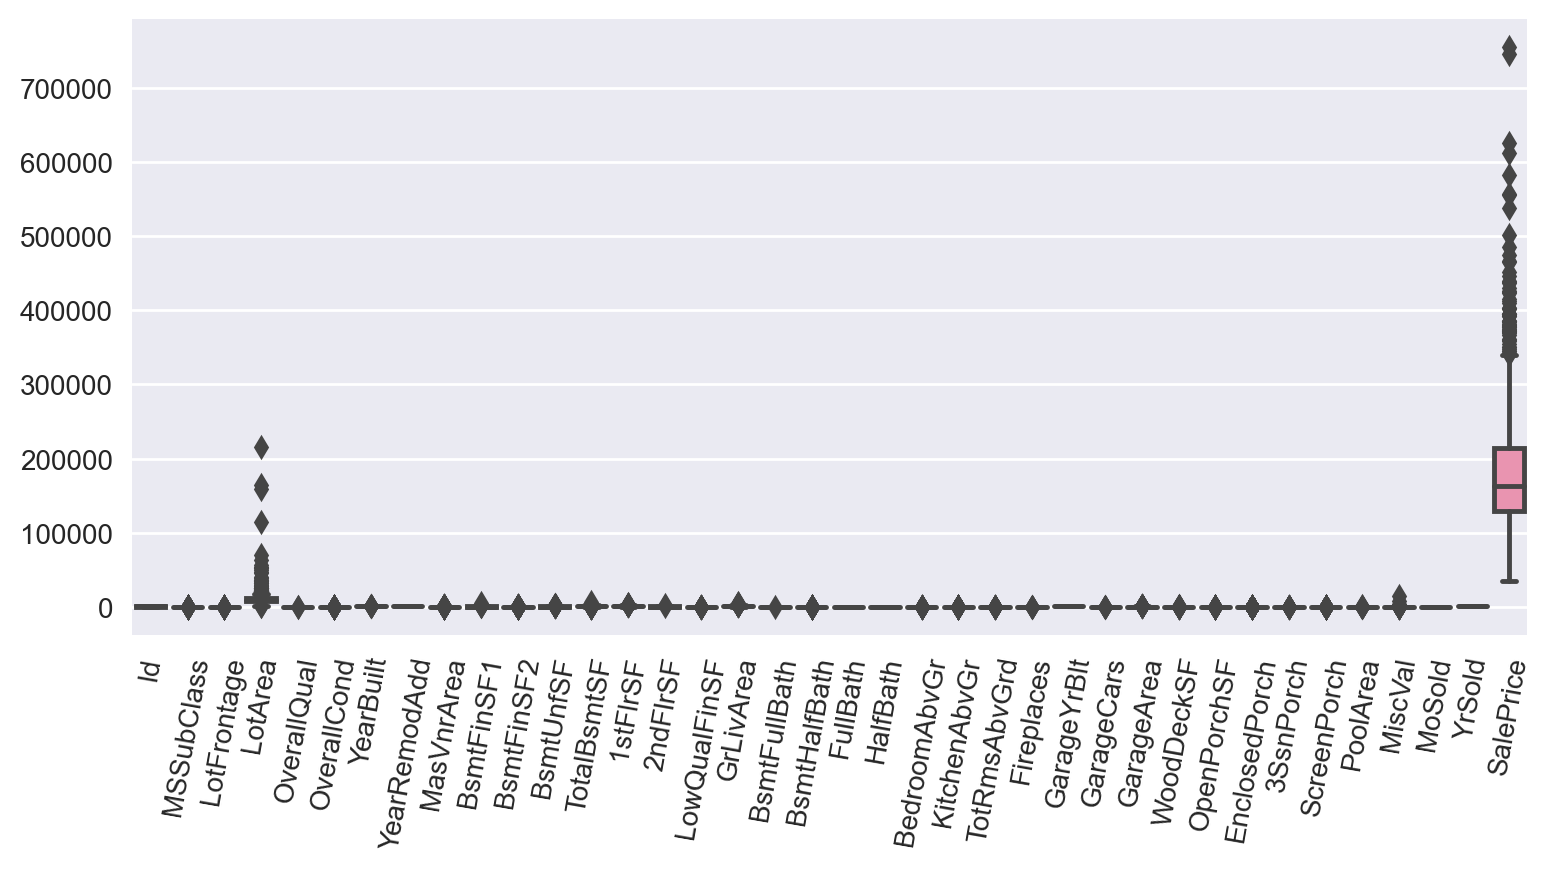

In [9]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(data = data_num)
plt.xticks(rotation = 80)
plt.show()

# Dealing with Null Values

In [10]:
data_num.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [11]:
data_num.LotFrontage.replace(np.nan, data_num.LotFrontage.median(), inplace = True)
data_num.GarageYrBlt.replace(np.nan,data_num.GarageYrBlt.median(),inplace = True)
data_num.MasVnrArea.replace(np.nan, data_num.MasVnrArea.median(),inplace = True)

In [12]:
data_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Correlation Between Numerical Columns

In [13]:
data_corr = data_num.corr()
data_corr['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.466754
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [14]:
house_train = []
house_train.extend(data_corr[(data_corr['SalePrice']>0.3)].index.values)
house_train.extend(data_corr[(data_corr['SalePrice']<-0.3)].index.values)

In [15]:
house_train

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [16]:
data_num = data_num[house_train]

In [17]:
data_num

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,2,7,1,1999.0,2,460,0,40,175000
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,2,7,2,1978.0,2,500,349,0,210000
1457,66.0,7,1941,2006,0.0,275,1152,1188,1152,2340,2,9,2,1941.0,1,252,0,60,266500
1458,68.0,5,1950,1996,0.0,49,1078,1078,0,1078,1,5,0,1950.0,1,240,366,0,142125


# Plotting Boxplot for Numerical Columns

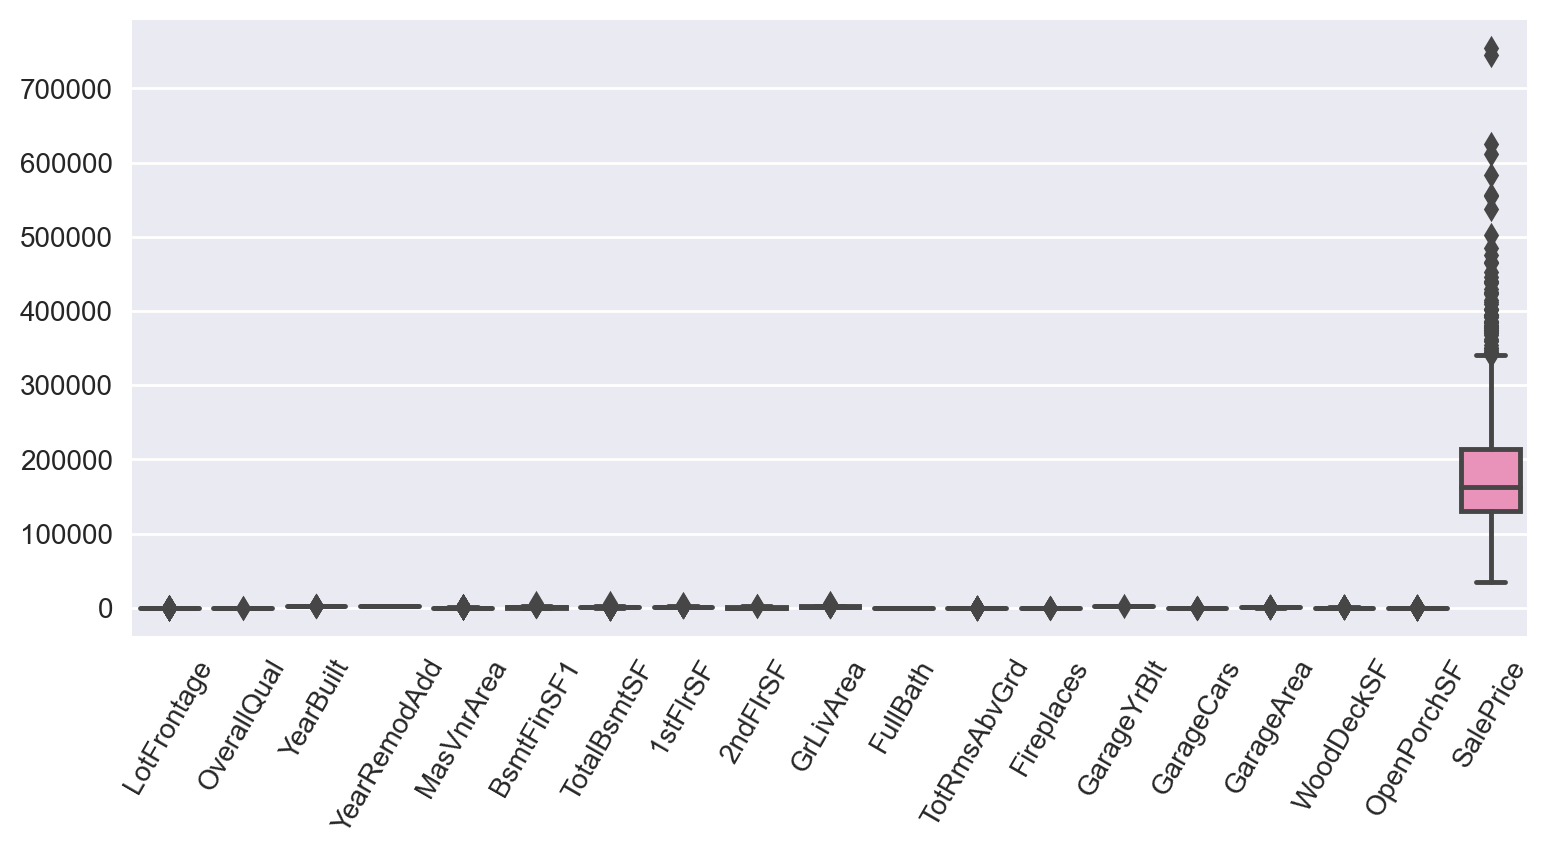

In [18]:
plt.figure(figsize =(9,4), dpi = 200)
sns.boxplot(data = data_num)
plt.xticks(rotation = 60)
plt.show()

# Removing the datapoints which are more than 75% and less than 25%


In [19]:
data_num.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='SalePrice'>

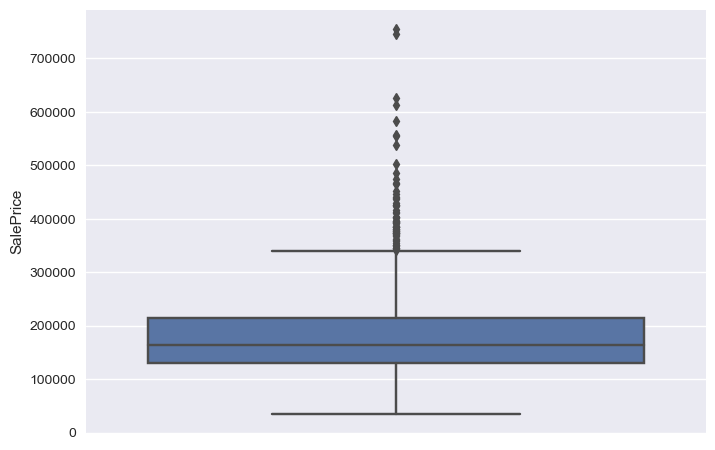

In [20]:
sns.boxplot(y = data_num.SalePrice)

In [21]:
data_s = data_num[(data_num.SalePrice>129975.00)&(data_num.SalePrice<214000.00)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='SalePrice'>

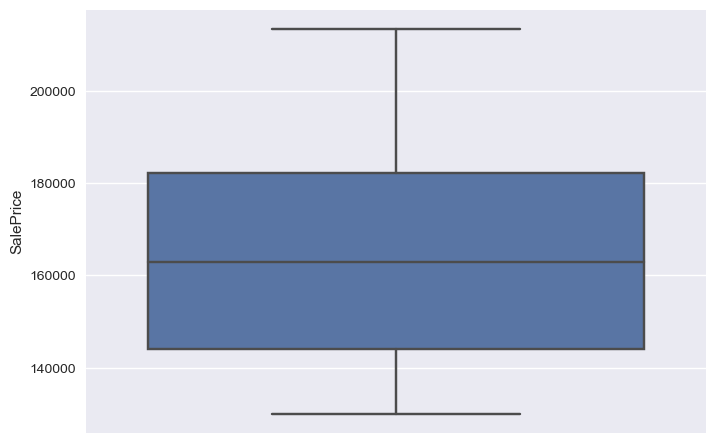

In [22]:
sns.boxplot(y = data_s.SalePrice)

# Removing the datapoints which are more than 75% and less than 25%

In [23]:
data_s.LotFrontage.describe()

count    728.000000
mean      69.016484
std       20.220783
min       24.000000
25%       60.000000
50%       69.000000
75%       76.000000
max      313.000000
Name: LotFrontage, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='LotFrontage'>

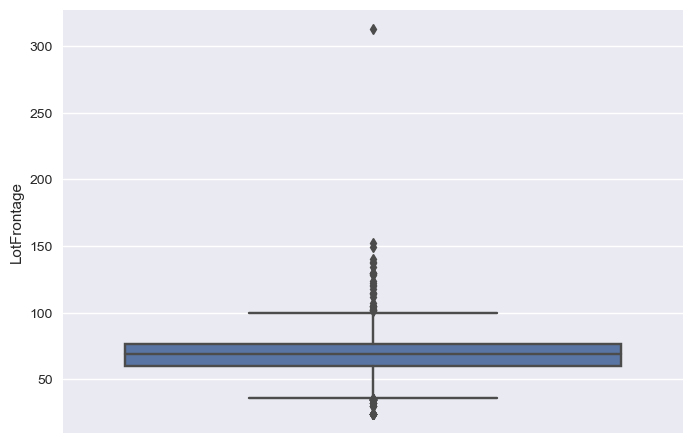

In [24]:
sns.boxplot(y = data_s.LotFrontage)

In [25]:
data_lf = data_s[(data_s.LotFrontage>60.00)&(data_s.LotFrontage<76.00)]

<AxesSubplot:ylabel='LotFrontage'>

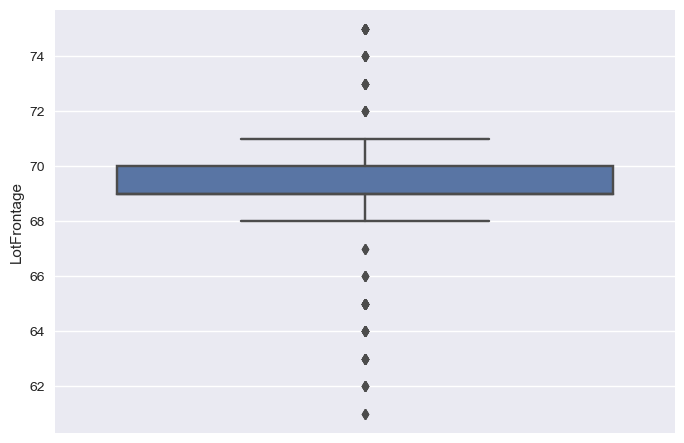

In [26]:
sns.boxplot(y = data_lf.LotFrontage)

# Removing the datapoints which are more than 75% and less than 25%

In [27]:
data_lf.MasVnrArea.describe()

count    349.000000
mean      80.111748
std      126.139480
min        0.000000
25%        0.000000
50%        0.000000
75%      136.000000
max      650.000000
Name: MasVnrArea, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='MasVnrArea'>

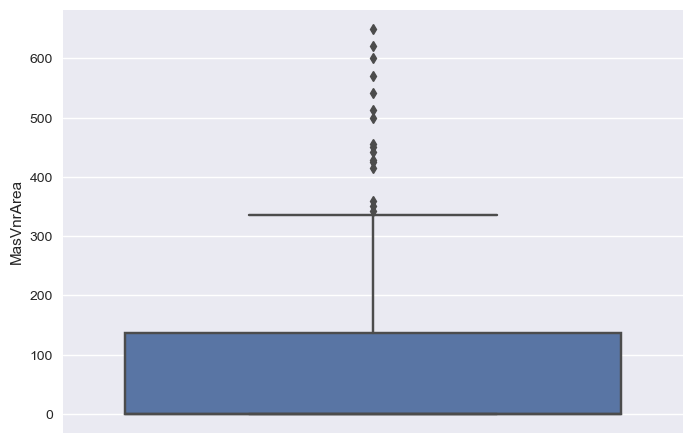

In [28]:
sns.boxplot(y = data_lf.MasVnrArea)

In [29]:
data_m = data_lf[(data_lf.MasVnrArea>0)&(data_lf.MasVnrArea<136.00)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='MasVnrArea'>

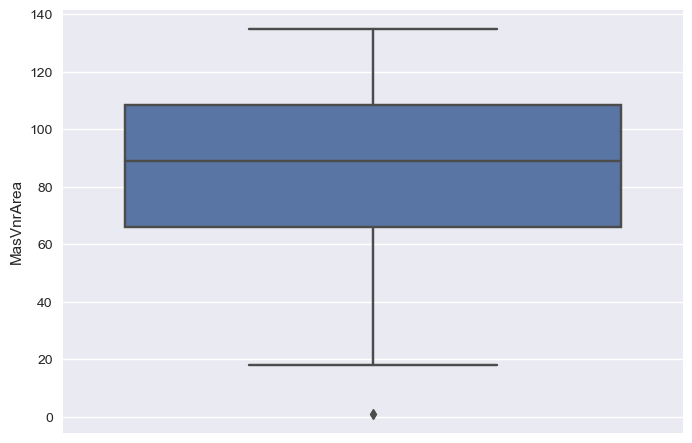

In [30]:
sns.boxplot(y = data_m.MasVnrArea)

# Removing the datapoints which are more than 75% and less than 25%

In [31]:
data_m.TotalBsmtSF.describe()

count      59.000000
mean     1069.881356
std       311.662233
min       372.000000
25%       864.000000
50%      1080.000000
75%      1255.500000
max      1728.000000
Name: TotalBsmtSF, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='TotalBsmtSF'>

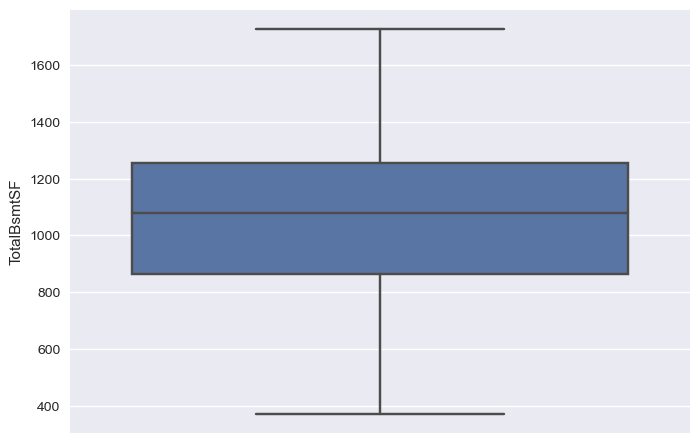

In [32]:
sns.boxplot(y = data_m.TotalBsmtSF)

In [33]:
data_b = data_m[(data_m.TotalBsmtSF>864.00)&(data_m.TotalBsmtSF<1255.5)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='TotalBsmtSF'>

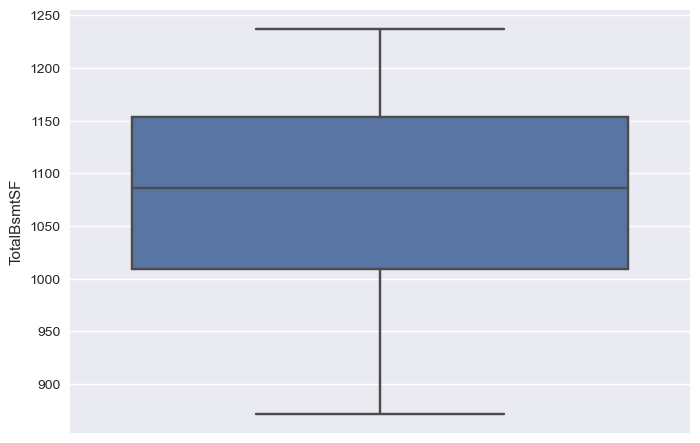

In [34]:
sns.boxplot(y = data_b.TotalBsmtSF)

# Removing the datapoints which are more than 75% and less than 25%

In [35]:
data_b.BsmtFinSF1.describe()

count      28.000000
mean      623.142857
std       229.494406
min         0.000000
25%       563.000000
50%       633.000000
75%       743.500000
max      1097.000000
Name: BsmtFinSF1, dtype: float64

# Plotting Boxplot before removal

<AxesSubplot:ylabel='BsmtFinSF1'>

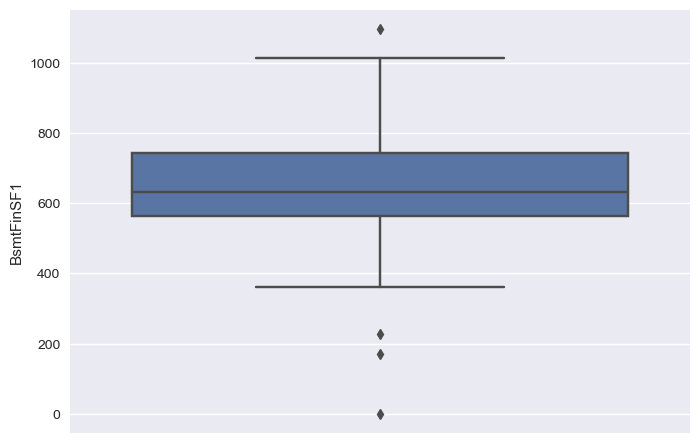

In [36]:
sns.boxplot(y = data_b.BsmtFinSF1)

In [37]:
data_bs = data_b[(data_b.BsmtFinSF1>563.00)&(data_b.BsmtFinSF1<743.5)]

# Plotting Boxplot after removal

<AxesSubplot:ylabel='BsmtFinSF1'>

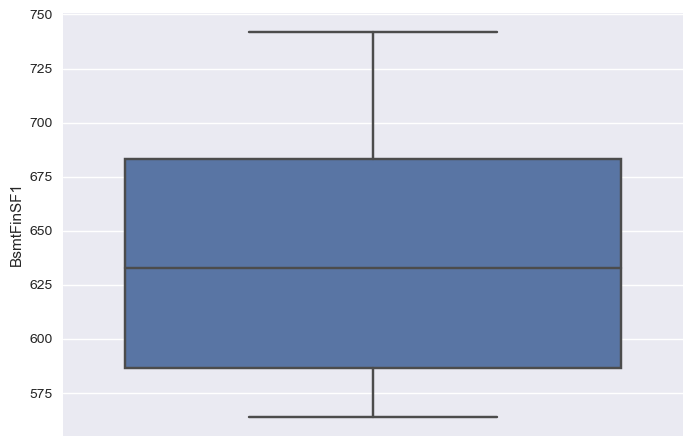

In [38]:
sns.boxplot(y = data_bs.BsmtFinSF1)

# Standard  Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc=scaler.fit(data_bs)
df_scaler= sc.fit_transform(data_bs)

<AxesSubplot:>

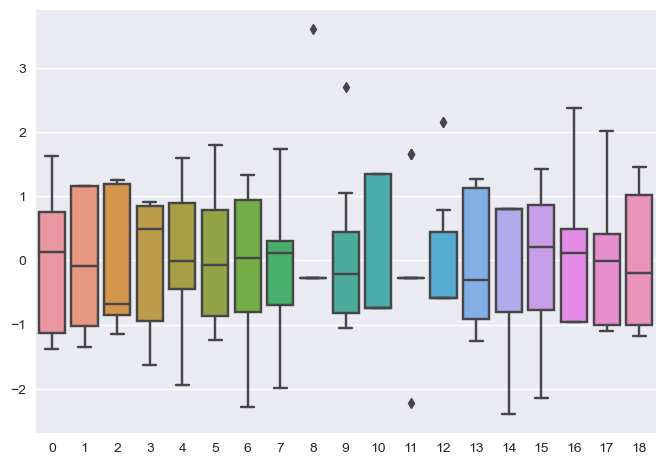

In [40]:
sns.boxplot(data = df_scaler)

# MinMax Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc=scaler.fit(data_bs)
df_scaler_minmax= sc.fit_transform(data_bs)

<AxesSubplot:>

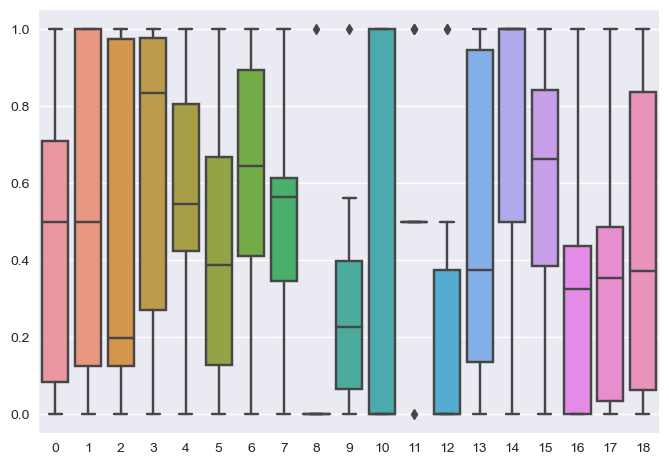

In [42]:
sns.boxplot(data = df_scaler_minmax)

# Categorical Columns

In [43]:
data_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Dealing with Null Values

In [44]:
data_cat.isnull().sum().sort_values(ascending= False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [45]:
data_cat = data_cat.drop('PoolQC',axis =1)
data_cat = data_cat.drop('Fence',axis =1)
data_cat = data_cat.drop('MiscFeature',axis =1)
data_cat = data_cat.drop('Alley',axis =1)

In [46]:
data_cat['MasVnrType'].fillna(data_cat.MasVnrType.value_counts().idxmax(),inplace = True)
data_cat['BsmtCond'].fillna(data_cat.BsmtCond.value_counts().idxmax(),inplace = True)
data_cat['BsmtExposure'].fillna(data_cat.BsmtExposure.value_counts().idxmax(),inplace = True)
data_cat['BsmtFinType1'].fillna(data_cat.BsmtFinType1.value_counts().idxmax(),inplace = True)
data_cat['BsmtFinType2'].fillna(data_cat.BsmtFinType2.value_counts().idxmax(),inplace = True)
data_cat['FireplaceQu'].fillna(data_cat.FireplaceQu.value_counts().idxmax(),inplace = True)
data_cat['GarageType'].fillna(data_cat.GarageType.value_counts().idxmax(),inplace = True)
data_cat['BsmtQual'].fillna(data_cat.BsmtQual.value_counts().idxmax(),inplace = True)
data_cat['GarageCond'].fillna(data_cat.GarageCond.value_counts().idxmax(),inplace = True)
data_cat['GarageQual'].fillna(data_cat.GarageQual.value_counts().idxmax(),inplace = True)
data_cat['GarageFinish'].fillna(data_cat.GarageFinish.value_counts().idxmax(),inplace = True)
data_cat['GarageQual'].fillna(data_cat.GarageQual.value_counts().idxmax(),inplace = True)

In [47]:
data_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [48]:
data_cat['Electrical'].fillna(data_cat.Electrical.value_counts().idxmax(),inplace = True)

In [49]:
data_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat=data_cat.apply(encoder.fit_transform)

In [51]:
data_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,4,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,4,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,2,1,2,4,4,2,8,4


In [52]:
data_cat=data_cat.loc[data_bs.index.values,:]

In [53]:
data_cat.shape

(14, 39)

# Concatenate Numerical Values and Categorical Values

In [54]:
d1 = pd.DataFrame(df_scaler,columns = data_num.columns)

In [55]:
d1.reset_index(inplace = True)

In [56]:
data_cat.reset_index(inplace = True)

In [57]:
data_final=pd.concat([d1,data_cat],axis=1)

# Final DataSet

In [58]:
data_final

,index,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,1.626817,-0.089443,-0.849737,-1.534775,1.588801,-1.141055,-0.200106,-0.699944,-0.277350,...,3,6,2,1,2,4,4,2,8,4
1,1,0.125140,-1.341641,-0.849737,0.114216,0.002266,-1.192310,-0.923068,-0.880668,-0.277350,...,0,6,2,0,1,4,4,2,8,0
2,2,-1.376537,1.162755,1.125825,0.813788,1.112841,0.738329,-0.200106,-0.699944,-0.277350,...,2,6,2,1,2,4,4,2,8,4
3,3,0.875978,-0.089443,-0.935631,-1.634714,-0.346771,-0.355130,0.964667,0.076497,-0.277350,...,3,6,2,1,1,4,4,2,8,4
4,4,-1.126258,1.162755,1.254666,0.913726,0.732073,0.464964,1.085161,0.156818,-0.277350,...,2,6,2,1,1,4,4,2,6,5
5,5,0.125140,-0.089443,0.782249,0.414032,-1.362154,1.797618,-2.288665,-1.985088,3.605551,...,3,6,2,1,0,4,4,2,8,4
6,6,1.626817,-1.341641,-1.150366,0.563941,-0.473694,0.225770,-0.923068,1.194304,-0.277350,...,3,2,4,4,2,4,4,2,8,4
7,7,0.125140,-0.089443,-0.763843,-0.085662,0.002266,-0.731007,0.442528,1.636072,-0.277350,...,2,6,2,1,2,4,4,2,8,4
8,8,-1.126258,1.162755,1.254666,0.913726,-0.092926,1.490083,1.326149,0.317461,-0.277350,...,2,6,2,1,1,4,4,2,8,4
9,9,0.125140,-0.089443,-0.592055,-1.234958,0.954187,-1.243566,0.271828,1.743168,-0.277350,...,3,6,1,1,1,4,4,2,8,4


# Spliting dependent and independent columns

In [59]:
x = data_final.drop('SalePrice', axis = 1)

In [60]:
y = data_final[['SalePrice']]

# Spliting the Data for Training(70%) and Testing(30%)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 50)

# Model Training

# LinearRegression Training Score

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lin = regressor.fit(x_train, y_train)
lin.score(x_train,y_train)

1.0

# DecisionTreeRegressor Training Score

In [63]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion= 'absolute_error', max_depth = 5)
dec =regressor.fit(x_train,y_train)
dec.score(x_train,y_train)

0.9999786421251712

# RandomForestRegressor Training Score

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, max_depth = 3)
ran = regressor.fit(x_train, y_train)
ran.score(x_train,y_train)

0.894261390051369

# Model Validation

In [65]:
from sklearn.metrics import accuracy_score, r2_score

In [66]:
lr_y_pred = lin.predict(x_test)
dt_y_pred = dec.predict(x_test)
rf_y_pred = ran.predict(x_test)

# LinearRegression Testing Score

In [67]:
r2_score(y_test,lr_y_pred)

0.6881395435412359

# DecisionTreeRegressor Testing Score

In [68]:
r2_score(y_test,dt_y_pred)

0.7816374176014803

# RandomForestRegressor Testing Score

In [69]:
r2_score(y_test,rf_y_pred)

0.41959565730021975